In [1]:
## Install the library first
#!pip install https://github.com/sodascience/artscraper.git
from pathlib import Path

from artscraper import GoogleArtScraper, WikiArtScraper

# to show the images
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# 1. Examples in interactive mode

Use this mode to download images one by one, or to create your workflow

## 1.1. WikiArt

Make sure to obtain [the API keys](https://www.wikiart.org/en/App/GetApi).

In [2]:
Path("data").mkdir(exist_ok=True)

In [ ]:
art_url = "https://www.wikiart.org/en/aleksandra-ekster/women-s-costume-1918"

scraper = WikiArtScraper()
scraper.load_link(art_url)
metadata = scraper.get_metadata()
scraper.save_image("data/wikiart_example.jpg")
print(metadata)

# display the image
img = mpimg.imread("data/wikiart_example.jpg")
plt.imshow(img)
plt.show()

# make sure to close the scraper
scraper.close()

## 1.2 GoogleArt

In [3]:
art_url = "https://artsandculture.google.com/asset/helena-hunter-fairytales/dwFMypq0ZSiq6w"

In [8]:
# If you are on Windows, you can download geckodriver, place it in your directory,
#  and use the argument geckodriver_path="geckodriver.exe"
scraper = GoogleArtScraper() 
scraper.load_link(art_url)
metadata = scraper.get_metadata()
scraper.save_image("data/googleart_example.png")
print(metadata)

{'main_text': '', 'title': 'Helena Hunter FAIRYTALES', 'id': 'dwFMypq0ZSiq6w', 'link': 'https://artsandculture.google.com/asset/helena-hunter-fairytales/dwFMypq0ZSiq6w'}


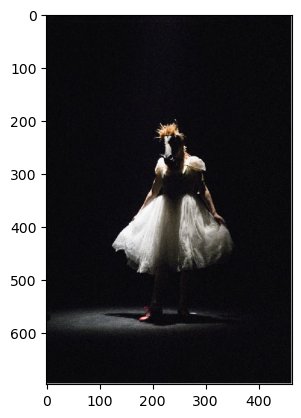

In [9]:
# display the image
img = mpimg.imread("data/googleart_example.png")
plt.imshow(img)
plt.show()

# make sure to close the scraper
scraper.close()

# 2. Examples in automatic mode

Use this mode to download many images. Each artwork will be downloaded in its own folder (containing the image and the metadata) within the folder specified in the argument `output_dir`.

## 2.1 WikiArt example

In [ ]:
some_links = [
    "https://www.wikiart.org/en/aleksandra-ekster/women-s-costume-1918",
    "https://www.wikiart.org/en/aleksandra-ekster/still-life-1913",
    "https://www.wikiart.org/en/aleksandra-ekster/view-of-paris-1912"
]

with WikiArtScraper(output_dir="data") as scraper:
    for url in some_links:
        scraper.load_link(url)
        scraper.save_metadata()
        scraper.save_image()

## 2.2 GoogleArt example

In [10]:
some_links = [
    "https://artsandculture.google.com/asset/helena-hunter-fairytales/dwFMypq0ZSiq6w",
    "https://artsandculture.google.com/asset/erina-takahashi-and-isaac-hernandez-in-fantastic-beings-laurent-liotardo/MQEhgoWpWJUd_w",
    "https://artsandculture.google.com/asset/rinaldo-roberto-masotti/swG7r2rgfvPOFQ"
]

# If you are on Windows, you can download geckodriver, place it in your directory,
#  and use the argument geckodriver_path="geckodriver.exe"
with GoogleArtScraper("data") as scraper: 
    for url in some_links:
        scraper.load_link(url)
        scraper.save_metadata()
        scraper.save_image()